#### Using sklearn, take file and run generate classification model. 3 lib are used: Random Forest, SVC & Nueral networks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

In [14]:
def classification_performance(y_test, pred):
    # model performance
    cr = classification_report(y_test, pred)
    print ('classification_report: \n', cr)
    cm = confusion_matrix(y_test, pred)
    print ('confusion_matrix: for each classification, how may correct, how many incorrect:\n', cm )

    print ('Accuracy score:', accuracy_score(y_test, pred))

In [3]:
#Loading dataset
wine_i = pd.read_csv('./data/winequality-red.csv', sep = ';')

### transform quality from number to 0 or 1 (bad or good)

In [4]:
# Pre processing
wine = wine_i.copy()
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine.quality = pd.cut(wine.quality, bins=bins, labels = group_names)
# wine.quality.unique()
label_quality = LabelEncoder()
wine.quality = label_quality.fit_transform(wine.quality)


<AxesSubplot:xlabel='quality', ylabel='count'>

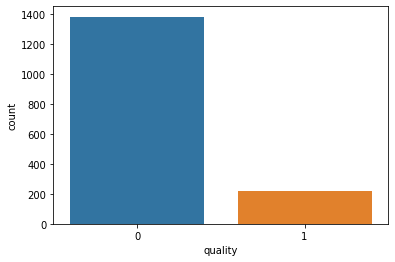

In [5]:
### Info:
# wine.quality.unique()
# wine.describe()
# wine.quality.value_counts()
sns.countplot(x = wine.quality)


In [6]:
X = wine.drop('quality', axis='columns')
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42) 

In [19]:
# Apply standard scalling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

run_all_classification(X_train, X_test, y_train, y_test)

******************** Random Forest Calssification ********************
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

confusion_matrix: for each classification, how may correct, how many incorrect:
 [[263  10]
 [ 23  24]]
Accuracy score: 0.896875
******************** SVC Calssification ********************
classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

confusion_matrix: for each classifi

c:\Program Files\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## 1- Random Forest Classifier model

In [9]:
def random_forest(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)

    # classification_performance(y_test, pred_rfc)
    return pred

## 2- SVC Model

In [10]:
def run_SVC(X_train, X_test, y_train, y_test):
    rlf = SVC()
    rlf.fit(X_train, y_train)
    pred = rlf.predict(X_test)

    # classification_performance(y_test, pred_rlf)
    return pred

## 3- Nueral Networks

In [11]:
def run_nueral_networks(X_train, X_test, y_train, y_test):
    mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
    mlpc.fit(X_train, y_train)
    pred = mlpc.predict(X_test)

    # classification_performance(y_test, pred)
    return pred


## run all classification models

In [18]:
reg_method= ['Random Forest Calssification', 
            'SVC Calssification', 
            'Nueral Network Calssification']

reg_functions = [random_forest, 
                    run_SVC,
                    run_nueral_networks] 

def run_all_classification(X_train, X_test, y_train, y_test):
    
    for reg_model_id, reg_fn in enumerate(reg_functions):
        print (20*'*', reg_method[reg_model_id],20*'*' )
        pred = reg_fn(X_train, X_test, y_train, y_test)
        classification_performance(y_test, pred)
    # random_forest(X_train, X_test, y_train, y_test)
    # run_SVC(X_train, X_test, y_train, y_test)
    # run_nueral_networks(X_train, X_test, y_train, y_test)